## Análisis de usuarios (I)

### Índice 
<a href="#id1">1. Familiarización con los datos<br>
<a href="#id1.1" style="padding-left:1em">1.1. Explicación de atributos<br>
<a href="#id1.2" style="padding-left:1em">1.2. Análisis descriptivo de los datos<br>
<a href="#id1.3" style="padding-left:1em">1.3. Adición de atributos<br>
<a href="#id2">2. Cuestiones interesantes<br>
<a href="#id2.1" style="padding-left:1em">2.1. Número de registros a lo largo del tiempo<br>
<a href="#id2.2" style="padding-left:1em">2.2. Frecuencia de nombres<br>
<a href="#id2.3" style="padding-left:1em">2.3. Evolución de los likes a lo largo del tiempo<br>
<a href="#id3">3. Clusterización de usuarios<br>
<a href="#id3.1" style="padding-left:1em">3.1. Análisis de outliers<br>
<a href="#id3.2" style="padding-left:1em">3.2. Usuarios poco conocidos<br>
<a href="#id3.3" style="padding-left:1em">3.3. Tipos de opiniones de los overliers<br>
    

In [1]:
import pandas as pd

df_users_limpio = pd.read_csv('../Dataset/datos_users_limpio.csv')

<a id="id1"></a>
## 1. Familiarización con los datos

<a id="id1.1"></a>
### 1.1. Explicación de atributos

In [2]:
# Imprimimos todas las columnas del describe
pd.set_option('display.max_columns', 500)

df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17


Nos encontramos en un dataset de usuarios, por lo que cada línea fila del dataset es un usuario. Cabe destacar que todos los números de cada fila hacen referencia al total que ese usuario ha tenido en el sistema. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

- **num_opiniones**: Opiniones que el usuario ha hecho en total a lo largo de su trayectoria. Un número elevado de opiniones puede significar muchos años siendo experto, muchos seguidores y ser influencer. 


- **util, gracioso y guay**: Veces que el usuario ha puntuado como útil, gracioso o guay una opinión. Esto podría estar relacionado con lo crítico que es el usuario.


- **experto**: Lista con los años en los que el usuario ha sido experto en el sistema. Las personas que no han sido experto (que son la mayoría), tienen el string "Ninguno".


- **amigos**: Lista de los ID de los amigos que tiene ese usuario. Algunos usuarios **no tienen amigos**. Esto es puntualizado con el string "SinAmigos".


- **num_amigos**: Número de amigos que tiene el usuario. Introducimos esta columna ya que tratar con la lista de amigos no es útil en la mayoría de los casos.


- **seguidores**: Número de seguidores que el usuario tiene en total. Los usuarios con un número de seguidores elevado pueden ser significativos y posibles influencers.


- **media_puntuacion**: Puntuación media que el usuario da a opiniones de otras personas. Esta medida podría llegar a ser utilizada para diferenciar entre distintos tipos de usuarios. Personas con una media muy baja de puntuación podría suponer que son muy **críticos**.


- **like_X**: Todas las columnas de like se refieren al número de likes del tipo X que ha recibido el usuario a lo largo de su trayectoria en el sistema. Al igual que util, gracioso y guay, podría estar relacionado con número de opiniones y seguidores.


- **año_reg, mes_reg, etc...**: Fecha de registro fraccionada en año, mes, día y hora. Podría ser que hubiera días en los que se produjeran más registros a lo largo de la semana, **generando patrones interesantes**. En algunos momentos, se pueden producir **registros masivos** debido a algún evento especial (algún anuncio nuevo, se habla del sistema en la televisión, etc...)


### Añadimos el número de likes total

Como todos los likes tienen un comportamiento parecido, vamos a hacer una nueva columna que tenga la suma de todos ellos.

In [3]:
# Introducimos la nueva columna "num_likes"
df_users_limpio["num_likes"] = df_users_limpio.iloc[:, 11:22].sum(axis = 1)
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg,num_likes
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23,8
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22,3
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0,1
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15,4
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17,0


In [4]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:22] + cols[-1:] + cols[22:-1]

print(cols)
# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

['usuario_id', 'nombre', 'num_opiniones', 'util', 'gracioso', 'guay', 'experto', 'amigos', 'num_amigos', 'seguidores', 'media_puntuacion', 'like_moda', 'like_extras', 'like_perfil', 'like_formato', 'like_lista', 'like_comentario', 'like_simple', 'like_guay', 'like_divertido', 'like_textos', 'like_fotos', 'num_likes', 'anyo_reg', 'mes_reg', 'dia_reg', 'hora_reg']


<a id="id1.2"></a>
### 1.2. Análisis descriptivo de los datos

In [5]:
# Hacemos el análisis descriptivo de esta forma para quitar la notación científica
df_users_limpio.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,num_opiniones,util,gracioso,guay,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,mes_reg,dia_reg,hora_reg
count,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06
mean,22.2877,40.5277,17.9178,21.8805,45.7152,1.46565,3.68146,2.24223,0.332595,0.213513,0.190208,0.0835849,1.50394,3.09027,3.10682,3.10682,1.16533,1.13843,16.1737,2013.47,6.4201,15.7372,12.5857
std,76.9224,470.242,330.35,401.968,137.863,15.6832,1.15104,80.2182,13.6785,16.2668,12.698,10.8956,63.276,92.1142,88.2326,88.2326,32.6826,95.4914,517.442,2.60379,3.36132,8.80282,8.11387
min,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2004,1,1,0
25%,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2012,4,8,4
50%,5,3,0,0,2,0,3.89,0,0,0,0,0,0,0,0,0,0,0,0,2014,6,16,16
75%,15,13,3,3,39,0,4.6,0,0,0,0,0,0,0,0,0,0,0,1,2015,9,23,20
max,13278,154202,130207,148658,14995,9538,5,34167,13500,14173,13654,12669,57833,52103,32266,32266,15442,82602,277077,2018,12,31,23


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información con importancia:

- **num_opiniones:** 
    - La mayor parte de los usuarios tienen un **número de opiniones relativamente bajo** (los tres primeros cuartiles están por debajo de 16 opiniones). 
    - **Número de opiniones máximo en todos los usuarios de 13.278**, bastante elevado con respecto al resto de usuarios. 
    - Aún habiendo un máximo muy elevado, la media y la desviación estándar no toman valores muy grandes, lo cual nos quiere decir que **no hay demasiada gente con muchas opiniones**.


- **util, gracioso y guay:** 
    - El **75% de los usuarios del sistema dan "util"**. 
    - El **50% dan al menos un "gracioso" y "guay"**. 
    - Las tres columnas tienen un máximo muy elevado lo cual indica la **existencia de usuarios muy activos en la aplicación**.


- **num_amigos:** 
    - Hay un **25% de usuarios sin amigos**. 
    - Un **25% tiene más de 39 amigos**. 
    - La media es de 45 amigos, lo cual nos quiere decir que del 25% recién mencionado (el que tiene 39 amigos o más), debe haber gente con muchos amigos. 
    - El **máximo es muy elevado**, como en el resto de columnas recientemente mencionadas (14995 amigos). 


- **seguidores:** 
    - Como dato destacado, como mínimo el **75% de los usuarios NO tienen ningún seguidor** pero el **máximo de seguidores es muy elevado** (9538). 
    - Esto sumado a que la media y la desviación estándar son muy pequeñas, nos indica que hay un **número de usuarios muy pequeño con muchísimos seguidores (influencers)**.


- **media_puntuacion:**
    - Las puntuaciones dadas son buenas en general. Al menos un **75% de los usuarios dan como mínimo un 3 de media**.
    - Un **25% de los usuarios tiene menos de un 1 de media**, lo cual puede llegar a ser significativo. Los usuarios con puntuaciones medias tan bajas pueden ser personas muy **críticas**, **haters** o incluso **cuentas falsas**. También podrían ser aquellos usuarios que apenas hacen reviews de opiniones y las pocas que han hecho son malas.


- **Likes:** (Vamos a hablar de ellos todos juntos porque son muchos y se comportan de forma similar)
    - Como mínimo, el **50% de los usuarios reciben 0 likes de cualquier tipo** (atendiendo a la columna num_likes).
    - Un **25% de los usuarios del sistema reciben al menos 1 like** de cualquier tipo.
    - "like_guay" y "like_divertido" tienen exactamente la misma desviación, media, máximo y mínimo. Esto podría ser un error una redundancia en la base de datos.
    - El like con el máximo más alto es **"like_fotos"**. Esto puede ser un indicio no solo de que este like es el que más se utiliza, sino también que **la gente del sistema están normalmente más interesada en las fotografías**
    - El like con el máximo más bajo es **"like_lista"**. No sabemos a qué hace referencia este tipo de like, pero parece que las "listas" son las menos interesantes para los usuarios.

<a id="id1.3"></a>
### 1.3. Adición de atributos

A la hora de analizar los datos, han aparecido algunas ideas sobre nuevos atributos que podrían ser valiosos:

- **num_likes**: Numero total de likes. Lo hemos añadido con anterioridad para que se pudieran analizar mejor todos los demás tipos de likes.

- **anyoExperto**: Número de años en los que un usuario ha sido experto. Actualmente se tiene una lista con los años en los que ha sido experto, lo que dificulta su uso.

- **experiencia**: Experiencia del usuario en años. Se tiene el año en el que se registró pero tener los años de experiencia nos permitiría usarlo directamente.


### Año Experto

In [6]:
# Introducimos la nueva columna "anyoExperto"

df_users_limpio["anyoExperto"] = df_users_limpio["experto"].apply(lambda x: 0 if x == "Ninguno" else x.count(',') + 1)

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:7] + cols[-1:] + cols[7:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [8]:
# Introducimos la nueva columna "experiencia"

df_users_limpio["experiencia"] = df_users_limpio["anyo_reg"].apply(lambda x: 2018 - x)

In [9]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:25] + cols[-1:] + cols[25:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [10]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017",3,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,2013,5,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,0,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2013,5,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,2013,5,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,0,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,2014,4,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018",4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,2013,5,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,0,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2016,2,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,0,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,0,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,0,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,10,15,17


<a id="id1.5"></a>
### 1.5. Explicación de correlaciones

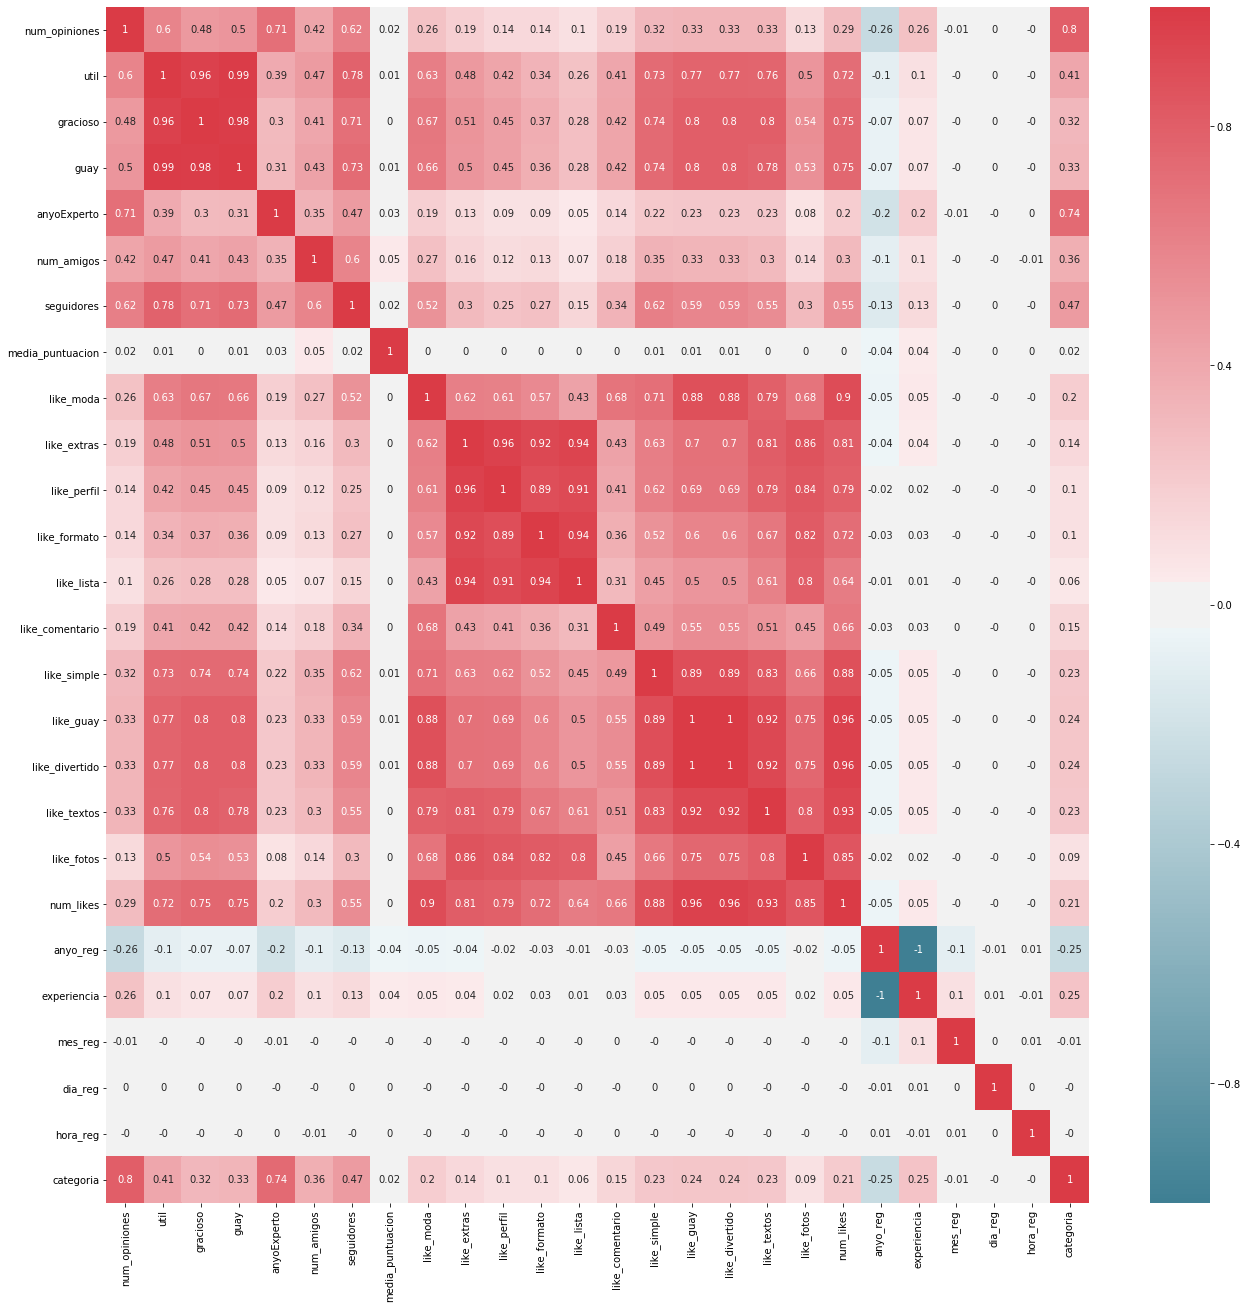

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matriz = df_users_limpio.corr().round(2)

#mask = np.zeros_like(corr_matriz, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

#Colores del mapa
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(22,22))
# annot = True to print the values inside the square
sns.heatmap(data=corr_matriz, annot=True, cmap=cmap)

En la matriz de correlaciones podemos ver algunos sucesos que son bastante interesantes.

- **Util, gracioso y guay** están muy correlados entre sí. Esto la verdad es que no tiene demasiado sentido. Se supone que estas tres variables hacen referencia a la cantidad de Util, Gracioso y Guay que da el usuario en concreto, no los que recibe. La única explicación posible es que aquellos usuarios que dan muchos util, también den muchos graciosos. En la siguiente gráfica se puede ver esta clara correlación.

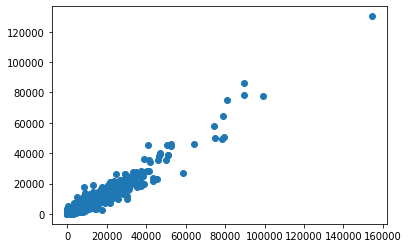

In [12]:
plt.scatter(df_users_limpio['util'], df_users_limpio['gracioso'], cmap='rainbow')

- **Likes**: Todos los likes están bastante relacionados entre sí. Suponemos que en la época en la que se utilizaban estos likes, cuando una persona llegaba a conseguir una gran cantidad de likes de un tipo de una de sus publicaciones, también recibía bastantes likes en las otras categorías. Se debe destacar el caso de like_guay y like_divetido, ya que tienen una correlación de 1, como si fueran exactamente el mismo like.

<a id="id2"></a>
## 2. Cuestiones interesantes
<a id="id2.1"></a>
### 2.1. Numero de registros a lo largo del tiempo

Sería interesante tener el día de la semana para analizar el número de registros por día, por lo que se reconstruye la fecha y se obtiene el día de la semana con una función de pandas Datetime.

In [13]:
df_users_temp = df_users_limpio.copy()
df_users_temp['Fecha'] = df_users_temp["anyo_reg"].map(str) + '-' + df_users_temp["mes_reg"].map(str) + '-' + df_users_temp["dia_reg"].map(str)
df_users_temp['dia_semana']= pd.to_datetime(df_users_temp['Fecha']).dt.dayofweek
df_users_temp.sort_values(by='Fecha')

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,Fecha,dia_semana
511822,0sidDfoTIHle5vvHEBvF0w,George,55,41,36,26,"2006,2007",2,"HN8tqsJtkVzkGZ4H-wzYYA, EQSHAfMrLKqYK0zLx_01yw...",187,7,3.83,13,2,3,5,1,12,7,17,17,3,0,80,2004,14,10,12,15,2004-10-12,1
75034,yYSBB5q7bY-qSVvmMgk4FA,James,4,0,0,0,Ninguno,0,"9d071Ija3Bz9xDxDhnRy5g, G5LXEaxhQMF_BVjNHkVr7g...",10,0,3.80,0,0,0,0,0,0,0,1,1,0,0,2,2004,14,10,12,20,2004-10-12,1
819984,23J4vG9_xxxdnmi8CBX7Ng,Joan,1678,19634,14451,18447,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...",13,"mcG523uA11CIk8OP4ieRGQ, eBJ3_XXXQ6NUMjhm2GsSZA...",3849,1320,4.36,3343,286,281,337,98,1334,4752,4645,4645,1713,2535,23969,2004,14,10,12,12,2004-10-12,1
1316894,c6HT44PKCaXqzN_BdgKPCw,Russel,108,283,166,247,2006,1,"a-9t439Vd_-AXaiIgYVqig, _aSs5dSAabuwnXUGBPzASw...",595,102,4.14,62,10,11,21,4,34,30,95,95,14,24,400,2004,14,10,12,8,2004-10-12,1
168294,npCUdiDUBmf5qVYDbIpRyg,Ryo,172,88,37,45,2007,1,"8-VVKObLiKYzFEOELPWiNA, akSlwjt_v1mOUmFEfEKVGw...",37,7,3.51,1,0,1,1,5,1,5,4,4,2,4,28,2004,14,10,12,14,2004-10-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955493,E1P7JvR6C7S9Yh5TJi3D9w,Una,4,5,0,0,Ninguno,0,MML8xqZgBe9zC79zobSs6g,1,1,4.00,1,0,0,0,0,0,0,0,0,0,0,1,2018,0,9,9,20,2018-9-9,6
1599997,qqi-AXhIfkKvZVKgJtEgPA,Angel,1,1,0,1,Ninguno,0,SinAmigos,0,0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,9,9,16,2018-9-9,6
300623,sjakwH0Pht01Tq1B4dQWIQ,Daniel,1,0,0,0,Ninguno,0,SinAmigos,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,9,9,21,2018-9-9,6
1473152,L8ZPHx-ozPq0uOQcKVwksA,Hannah,3,1,1,1,Ninguno,0,SinAmigos,0,0,2.33,0,0,0,0,0,1,0,0,0,0,0,1,2018,0,9,9,22,2018-9-9,6


Text(0.5, 1.0, 'Numero de registros por dia de la semana')

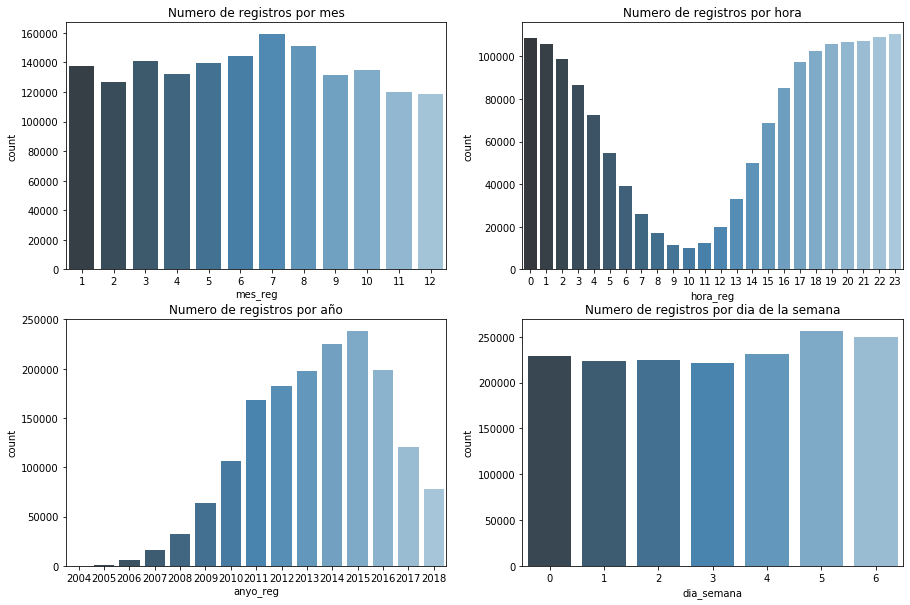

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.countplot(x="mes_reg", data=df_users_temp, palette="Blues_d")
plt.title("Numero de registros por mes")

ax = fig.add_subplot(2, 2, 2)
ax = sns.countplot(x="hora_reg", data=df_users_temp, palette="Blues_d")
plt.title("Numero de registros por hora")

ax = fig.add_subplot(2, 2, 3)
ax = sns.countplot(x="anyo_reg", data=df_users_temp, palette="Blues_d")
plt.title("Numero de registros por año")

ax = fig.add_subplot(2, 2, 4)
ax = sns.countplot(x="dia_semana", data=df_users_temp, palette="Blues_d")
plt.title("Numero de registros por dia de la semana")

De los anteriores registros se puede obtener información que puede ser de gran relevancia para nuestro cliente. En ellas se puede ver una media de los registros por año, mes y hora. Algo a tener en cuenta es que representa la suma de los registros agrupándolo de formas diferentes, tal vez cada año haya seguido una distribución diferente, pero podemos ver el comportamiento medio en ellas. Veamos que información se puede extraer de cada una de ellas:

- **Número de registros por mes**: De esta gráfica no se puede obtener mucha información, pero sí se puede ver que el mes en el que más registros se producen es en **Agosto**, tiene sentido ya que la gente puede tener más tiempo por vacaciones.


- **Número de registros por hora**: Este es uno de los gráficos más interesantes, este gráfico sigue una distribución muy peculiar que nos indica que el momento en el que menos se usa la plataforma es las **10 de la mañana**, y el momento en el que más, entre las **23 y 24 de la noche**. Estas horas de uso son algo extrañas, y podría ser que la plataforma se utilice en un país con **huso horario diferente** a las que recoge el servidor o que las horas estén normalizadas a un huso en concreto. El huso podría ser UTC+0, tendría sentido ya que más o menos sería restarle unas 7 horas a lo que aparece en las gráficas, donde las horas de menos uso serían las de la noche. Aunque esto es solo una suposición. Algo que también nos ha llamado la atención es que en el dataset de consejos se ha analizado el número de **likes por hora** y el número de **consejos por hora** y la distribución es muy parecida a esta, siendo este un indicativo de las **horas de uso de la plataforma**. Esta información podría ser muy interesante para utilizar **servidores dinámicos** y **minimizar gastos** en servidores en horas de poco uso o **reforzar servidores** a las horas puntas.


- **Número de registros por año**: Este gráfico nos da información del uso de la plataforma a lo largo de los años, y podemos observar como 2015 fue el año con mayor cantidad de registros y esto ha ido decayendo mucho en los últimos años.


- **Número de registros por dia de la semana**: Aunque pensábamos que se podría ver una gran diferencia entre los fines de semana y los días de diario, el resultado no ha sido para tanto. Sí se puede ver algo más de actividad los fines de semana, pero nada llamativo.

Con estos datos se podría hacer muchas cosas, se podría ver si se ha seguido la misma distribución dentro de cada año y sacar conclusiones, por ejemplo, el uso que se le daba en los años cercanos a 2005 no será el mismo que en 2017 gracias a los teléfonos moviles. Son muchas las cosas que pueden analizarse y buscar en los datos, pero es necesario limitarlo de alguna forma.

<a id="id2.2"></a>
### 2.2. Frecuencia de nombres

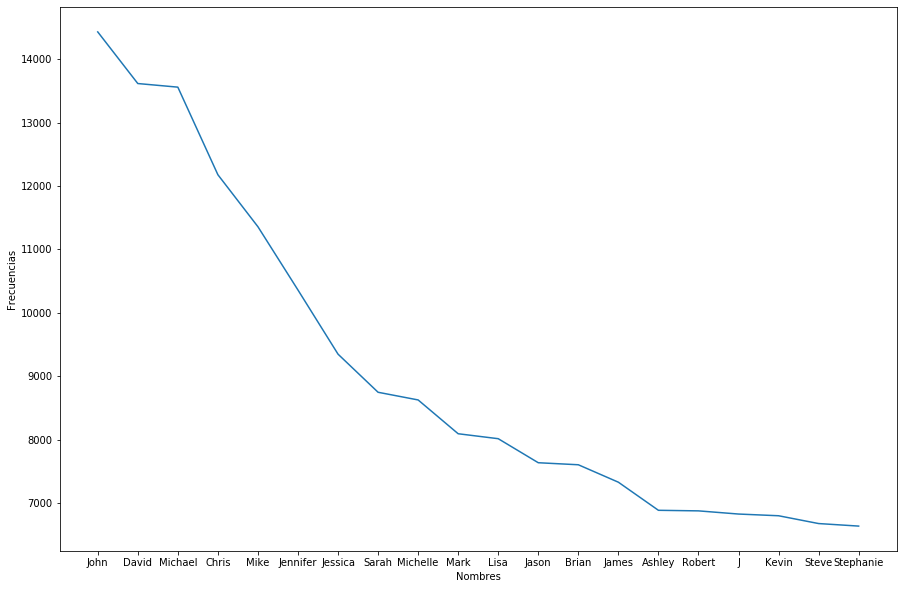

In [15]:
nombres = df_users_limpio.groupby('nombre')['nombre'].count().sort_values(ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.plot(nombres)
plt.ylabel('Frecuencias')
plt.xlabel('Nombres')
plt.show()

Este gráfico no nos aporta una gran información para extraer otros datos, pero si es interesante ver que los nombres más frecuentes coinciden con los nombres más frecuentes de chicos y chicas de EEUU. 
- https://global.mongabay.com/es/names/nombres-femeninos.htm
- https://global.mongabay.com/es/names/nombres-masculinos.htm

<a id="id2.3"></a>
### 2.3. Evolucion de los likes a lo largo del tiempo

Parece que hay muchos tipos de likes, pero... ¿Se usan todos?
Analizaremos el uso de estos likes a lo largo del tiempo.

In [16]:
X = df_users_limpio.groupby(['anyo_reg', 'mes_reg']).sum()

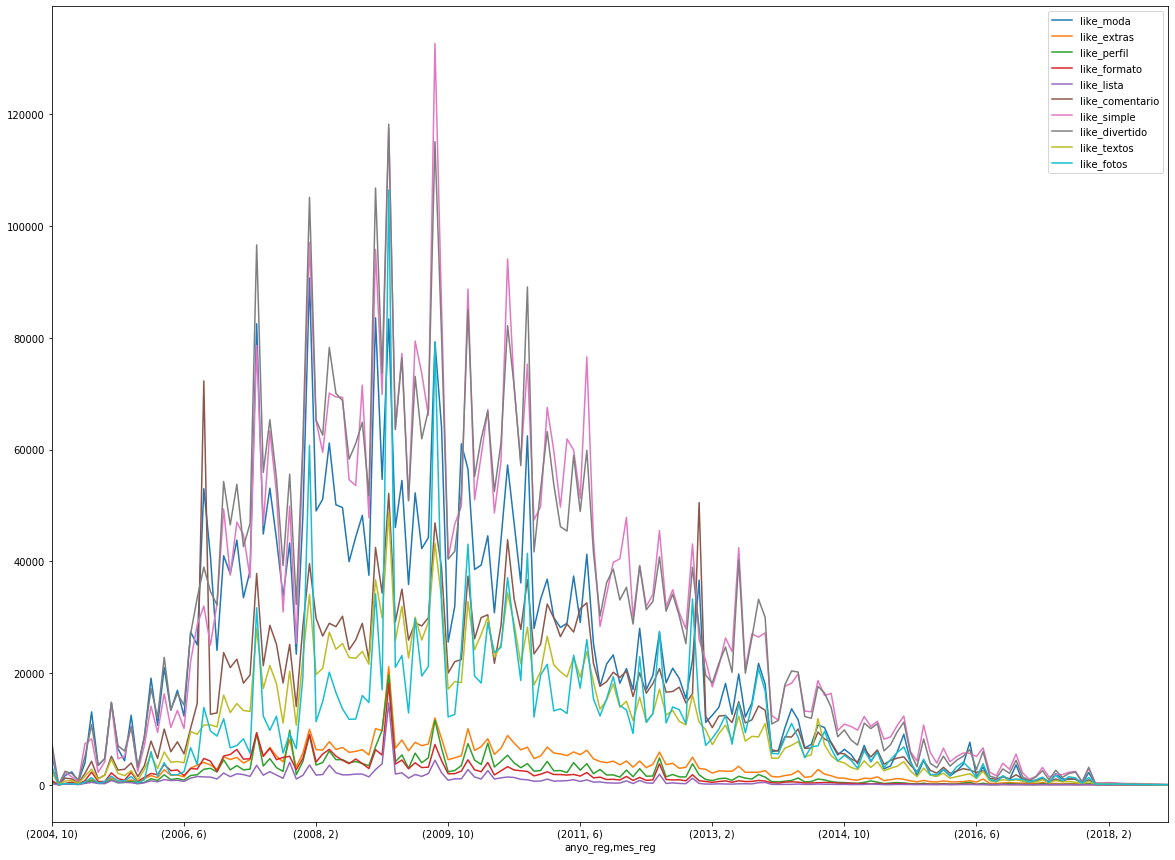

In [17]:
#Graficamos la cantidad de los tres compuestos más abundantes con respecto al día del año.
from matplotlib import pyplot
import seaborn

fig, ax = plt.subplots(figsize=(20,15))
X['like_moda'].plot(ax=ax)
X['like_extras'].plot(ax=ax)
X['like_perfil'].plot(ax=ax)
X['like_formato'].plot(ax=ax)
X['like_lista'].plot(ax=ax)
X['like_comentario'].plot(ax=ax)
X['like_simple'].plot(ax=ax)
X['like_divertido'].plot(ax=ax)
X['like_textos'].plot(ax=ax)
X['like_fotos'].plot(ax=ax)

ax.legend()

La anterior gráfica es algo dificil de comprender, ya no solo porque tiene una gran cantidad de datos sino que también la representación es algo abstracta.

La representación parece presentar el numero de likes por cada mes y en cada año, pero no es así ya que no podemos representar esto. Para representarlo necesitariamos tener estos atributos en el dataset de opiniones y su fecha, pero no tenemos esos datos. Lo que se representa es el total de likes desglosado según la fecha de registro del usuario.

De esta gráfica podemos extraer dos conclusiones, la primera es que podemos separar los tipos de likes en unos tres grupos:

   - Poco usados: Dentro de este grupo estarían los likes que apenas se han usado, like_lista, like_formato, like_perfil y like extras.
   - Medio usados: like_fotos, like_textos y like_comentario.
   - Muy usados: like_divertido, like_simple y like_moda.
    
La otra conclusión que podemos extraer es el uso que se le ha dado a la plataforma a lo largo de los años, de nuevo, no hay que confundir la fecha de la gráfica como si fuesen los likes que se han dado ese día. Lo que se puede obtener es que los usuarios que dieron una gran cantidad de likes se registraron entre el año 2006 y 2011. Si recordamos de gráficas anteriores, la mayor parte de los registros se realizaron entre 2010 y 2016. Una posible explicación a este caso, podría ser que los usuarios más antiguos en la aplicación han tenido mayor tiempo para dar likes (ya que el uso de la plataforma parece haber ido decayendo).

<a id="id3"></a>
## 3. Clusterización de usuarios

Con el objetivo de comenzar el análisis, intentamos generar una serie de histogramas de aquellas columnas que nos parecieran más útiles y que pensábamos que nos podían dar más información acerca de cómo de comportan los clientes.

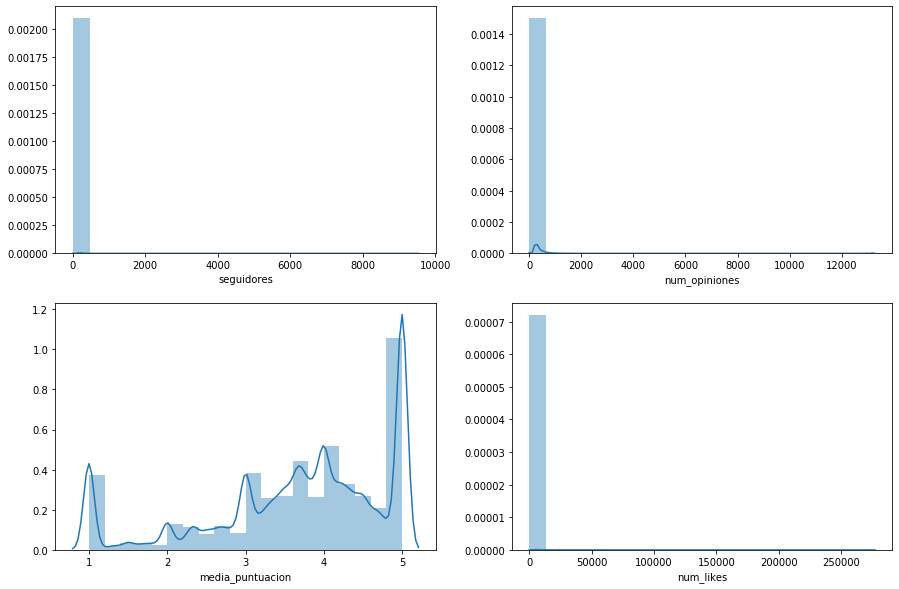

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df_users_limpio['seguidores'], bins = 20);

ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df_users_limpio['num_opiniones'], bins = 20);

ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot(df_users_limpio['media_puntuacion'], bins = 20);

ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot(df_users_limpio['num_likes'], bins = 20);

Los histogramas que obtenemos son anómalos por varios motivos:
- Según los histogramas, por ejemplo, no existe prácticamente ningún usuario con una cantidad de likes superior a 50.000. Obviamente, esto es imposible, ya que en el análisis previo nos hemos percatado de que existen varias personas que sí cumplen esta condición. En este caso, nos encontramos ante un problema de representación de la información y de posible clusterización; la cantidad de personas con muy pocos likes, muy pocas opiniones y muy pocos seguidores es **realmente alta**, por lo que deberíamos tratarlos por separado.


- El único histograma que aparece distinto es el de puntuación. Básicamente, esto se debe a que muchos usuarios que no reciben likes, no tienen seguidores y no tienen opiniones, sí puntúan otras opiniones. Como recordatorio, la media de puntuación hace referencia a **la media de puntuación que el usuario le ha dado a otras personas**. En estos histogramas, lo que está ocurriendo es que las distribuciones de los datos de los usuarios más frecuentes (los que menos likes, seguidores y opiniones tienen) destacan frente al resto de distribuciones. Por este motivo, podemos ver que, por ejemplo en el número de likes, la barra próxima al 0 es tan alta.

Al tener una cantidad de datos tan extremadamente alta, es normal que nos encontremos con este problema. La forma de abordar estos temas es mediante el uso de **clusterización** con el objetivo de separar instancias (en este caso, usuarios) en distintas categorías. De esta forma, podremos sacar conclusiones más precisas.

Con la clusterización que planteamos pretendemos diferenciar entre personas populares y personas no tan populares, lo que hemos denominado **"influencers"**. Después de haber estado pensando en qué variables pueden ser las más acertadas para hacer la clusterización, llegamos a las siguientes conclusiones:

- **seguidores**: Pensamos que es una de las variables más importantes para diferenciar entre distintos tipos de usuarios según popularidad. Sabemos que la gran mayoría de los usuarios no tienen apenas seguidores o directamente no tienen, pero esto puede permitirnos diferenciar a usuarios más alejados de lo normal que puedan tener utilidad ("influencers").


- **num_likes**: Al igual que seguidores, consideramos que el número de likes es una variable muy importante. Los likes pueden ser capaces de diferenciar distintos tipos de usuarios. Se debe diferenciar entre personas que reciben muchos likes (personas que normalmente van a tener muchas publicaciones o seguidores, o algo parecido) y personas con menos likes. Una persona que recibe muchos likes puede recibirlos ya que tiene muchas opiniones o las pocas que tiene son muy visitadas por la gente.


- **num_opiniones**: Para diferenciar lo dicho anteriormente, necesitamos saber si tienen muchas o pocas opiniones. No podemos comparar al mismo nivel a aquellas personas que tienen muchas publicaciones con las que no tienen apenas.

Estas serían las columnas que tendríamos en cuenta en caso de hacer una clusterización con el objetivo previamente indicado. Somos conscientes de que hay variables que también podrían llegar a ser útiles, como por ejemplo los siguientes:

- **util, gracioso, guay y media de puntuación**: Las tres primeras variables son un número que indica la cantidad de veces que se ha puntuado una opinion como útil, graciosa o guay, respectivamente. La última (media de puntuación) indica la media de puntuación que el usuario le da a los negocios a los que acude. Estas cuatro variables pueden llegar a diferenciar entre **usuarios críticos y no tan críticos**. Para la tarea que mencionamos anteriormente (encontrar influencers), no nos son tan útiles estas variables, pero podríamos llegar a tenerlas en cuenta más adelante.


- **anyoExperto y experiencia**: Sería normal pensar que a medida que aumenta el número de años que se ha sido experto o el número de años desde el registro, las opiniones sean mejores y, por lo tanto, los likes también. Sin embargo, hay algunos casos en los que se tienen muchas opiniones, seguidores, etc.. pero no se ha sido experto ningún año. Un ejemplo de este caso es el siguiente:


In [19]:
df_users_limpio[df_users_limpio['num_likes'] > 200000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
179457,JjXuiru1_ONzDkYVrHN0aw,Richard,1086,99162,77758,93938,"2011,2012,2013,2014,2015,2016,2017,2018",8,"MFI4twbiz8UJxU-XHSlH-g, Rjb-gVuAeS9h75Svz0aYsg...",4716,1434,4.12,16245,3637,5990,2829,2332,10139,52103,32266,32266,12128,44390,214325,2009,9,8,23,13
1146706,Tqm7Wu7IBJ1td3Ab5ZpUhw,Brian,1998,45970,35437,44267,Ninguno,0,"4P8EDoVkcSLJs2XP5DJIPg, N6tzBF-6Lx3Mip-w_C0E9g...",917,297,4.27,24328,13500,14173,13654,12669,15907,24928,29937,29937,15442,82602,277077,2009,9,1,1,2


Es un ejemplo muy concreto que hemos visto a lo largo de la experimentación, pero nos parece válido para justificar la idea mencionada en el punto anterior. Como se puede observar, Brian tiene 0 años como experto pero tiene una cantidad de "guay", "util" y likes realmente elevada.

Normalizamos las variables que nos interesan antes de hacer kmedias para que las distancias sean iguales en todos los casos. De esta forma, conseguimos que se le de la misma importancia a todas las variables que vamos a utilizar para clusterizar.

In [20]:
import pandas as pd
from sklearn import preprocessing

kmediasVar = ['seguidores', 'num_likes', 'num_opiniones']

x = df_users_limpio[kmediasVar].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_users_kmedias = pd.DataFrame(x_scaled, columns=kmediasVar)
df_users_kmedias

,seguidores,num_likes,num_opiniones
0,0.000524,0.000029,0.007155
1,0.000419,0.000011,0.002485
2,0.000000,0.000004,0.001205
3,0.000524,0.000014,0.001280
4,0.004089,0.001057,0.027188
...,...,...,...
1637133,0.000000,0.000000,0.000151
1637134,0.000000,0.000000,0.000603
1637135,0.000000,0.000000,0.000301
1637136,0.000000,0.000000,0.000075


Aplicamos el algoritmo KMedias con cuatro clusters puesto que nos parece la opción más adecuada después de haber probado con distintos números.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_users_kmedias)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
# plt.scatter(df_users_limpio['seguidores'], np.zeros(df_users_limpio['seguidores'].values.shape[0]), c=kmeans.labels_, cmap='rainbow')
# plt.show()


[[4.43294646e-05 5.59095492e-06 8.42298155e-04]
 [6.99564607e-03 3.78054648e-03 4.72366314e-02]
 [1.39257121e-03 4.27274652e-04 1.35662238e-02]
 [3.62376890e-02 3.33417343e-02 1.41738214e-01]]
[0 0 0 ... 0 0 0]


In [22]:
df_users_limpio['categoria'] = kmeans.labels_

En este gráfico se puede visualizar cómo se han generado los clusters utilizando las tres variables que hemos usado para hacer la clusterización. Aunque pueda que la distribución de los datos no es muy correcta, esta clusterización nos permite diferenciar entre distintos "niveles" de usuarios. Los usuarios del cluster más disperso son los más "populares", mientras que los que tienen el cluster más cercano al 0 son los menos populares. Así, podemos comenzar a hacer un análisis más profundo.

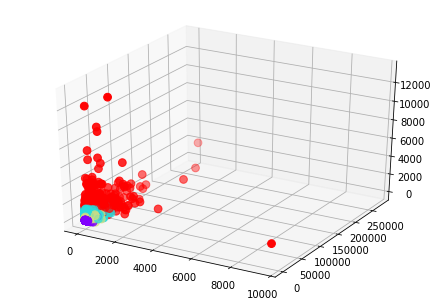

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_users_limpio['seguidores'], df_users_limpio['num_likes'], df_users_limpio['num_opiniones'], c=df_users_limpio['categoria'], cmap='rainbow', s=60)

In [24]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017",3,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,2013,5,10,8,23,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,0,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2013,5,2,21,22,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,2013,5,10,4,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,0,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,2014,4,5,22,15,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018",4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,2013,5,10,23,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,0,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2016,2,2,24,19,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,0,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,2,25,23,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,0,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,8,19,22,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,0,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,10,15,17,0


In [25]:
# Hacemos el describe del dataframe de users y lo agrupamos por categoría (cada uno de los clusters). 
# Luego, ordenamos el describe por el número de instancias que tiene.
describe = df_users_limpio.groupby('categoria').describe().sort_values(by=[('num_opiniones', 'count')], ascending = False)

# Hacemos que tanto en df_users_limpio como en el describe, la categoria 0
# haga referencia a las personas "menos populares" y la categoría 3 a las 
# "más populares"
orderedIndices = describe.index.tolist()
describe.reset_index()
df_users_limpio['categoria'] = df_users_limpio['categoria'].replace({orderedIndices[0]:0, orderedIndices[1]:1, orderedIndices[2]:2, orderedIndices[3]:3 })

describe

num_opiniones                                                   \
                  count         mean          std    min     25%     50%   
categoria                                                                  
0             1561262.0    11.185718    16.132284    0.0     2.0     5.0   
2               65887.0   180.178836    76.518086   29.0   119.0   156.0   
1                9282.0   627.255225   212.849851  262.0   466.0   560.0   
3                 707.0  1882.000000  1062.650443  328.0  1420.0  1631.0   

                                 util                                     \
              75%      max      count          mean           std    min   
categoria                                                                  
0            13.0     96.0  1561262.0     11.482375     27.910260    0.0   
2           222.0    415.0    65887.0    324.257016    434.070761    0.0   
1           725.0   1412.0     9282.0   1998.427063   2566.083433    8.0   
3          2016.5  13278.0      707.0  12034.963225  14249.719019  631.0   

                                                 gracioso               \
               25%     50%       75%       max      count         mean   
categoria                                                                
0             0.00     3.0     11.00    4785.0  1561262.0     3.208504   
2           121.00   209.0    374.00   21707.0    65887.0   138.242506   
1           731.25  1200.0   2212.75   52526.0     9282.0  1070.639302   
3          3562.00  7065.0  15060.00  154202.0      707.0  7466.212164   

                                                                       guay  \
                    std    min     25%     50%     75%       max      count   
categoria                                                                     
0             13.754245    0.0     0.0     0.0     2.0    3468.0  1561262.0   
2            297.968879    0.0    30.0    62.0   135.0   21126.0    65887.0   
1           1860.469642    4.0   226.0   459.0  1107.0   44898.0     9282.0   
3          11265.067275  157.0  1348.5  3633.0  9299.5  130207.0      707.0   

                                                                       \
                  mean           std    min     25%     50%       75%   
categoria                                                               
0             3.356084     14.244644    0.0     0.0     0.0      2.00   
2           168.517158    360.167708    0.0    37.0    75.0    166.00   
1          1367.662573   2331.489602    2.0   302.0   615.5   1439.75   
3          9595.294201  13126.719230  170.0  1919.5  4904.0  12109.50   

                    anyoExperto                                           \
                max       count      mean       std  min  25%  50%   75%   
categoria                                                                  
0            4733.0   1561262.0  0.022967  0.213102  0.0  0.0  0.0   0.0   
2           21527.0     65887.0  2.003036  2.081883  0.0  0.0  2.0   3.0   
1           50956.0      9282.0  5.535768  2.979993  0.0  4.0  6.0   8.0   
3          148658.0       707.0  7.473833  3.273697  0.0  6.0  8.0  10.0   

                num_amigos                                                \
            max      count         mean          std  min    25%     50%   
categoria                                                                  
0           8.0  1561262.0    36.981619    93.913608  0.0    0.0     1.0   
2          12.0    65887.0   165.738461   260.700502  0.0   27.0    86.0   
1          13.0     9282.0   525.120556   717.105177  0.0  147.0   308.0   
3          13.0      707.0  1852.724187  1913.496632  0.0  517.0  1079.0   

                            seguidores                                       \
               75%      max      count        mean         std   min    25%   
categoria                                                                     
0            32.00   6063.0  1561262.0    0.422909    2.

In [26]:
df_users_limpio[df_users_limpio['categoria'] == 3].to_csv("../Dataset/influencers.csv", index=False)

In [27]:
describe.iloc[0].unstack()

,count,mean,std,min,25%,50%,75%,max
num_opiniones,1561262.0,11.185718,16.132284,0.0,2.0,5.00,13.00,96.0
util,1561262.0,11.482375,27.910260,0.0,0.0,3.00,11.00,4785.0
gracioso,1561262.0,3.208504,13.754245,0.0,0.0,0.00,2.00,3468.0
guay,1561262.0,3.356084,14.244644,0.0,0.0,0.00,2.00,4733.0
anyoExperto,1561262.0,0.022967,0.213102,0.0,0.0,0.00,0.00,8.0
num_amigos,1561262.0,36.981619,93.913608,0.0,0.0,1.00,32.00,6063.0
seguidores,1561262.0,0.422909,2.235896,0.0,0.0,0.00,0.00,425.0
media_puntuacion,1561262.0,3.676297,1.175452,1.0,3.0,3.91,4.67,5.0
like_moda,1561262.0,0.160773,4.467535,0.0,0.0,0.00,0.00,3134.0
like_extras,1561262.0,0.068760,0.716908,0.0,0.0,0.00,0.00,679.0


In [28]:
describe.iloc[1].unstack()

,count,mean,std,min,25%,50%,75%,max
num_opiniones,65887.0,180.178836,76.518086,29.00,119.00,156.00,222.00,415.0
util,65887.0,324.257016,434.070761,0.00,121.00,209.00,374.00,21707.0
gracioso,65887.0,138.242506,297.968879,0.00,30.00,62.00,135.00,21126.0
guay,65887.0,168.517158,360.167708,0.00,37.00,75.00,166.00,21527.0
anyoExperto,65887.0,2.003036,2.081883,0.00,0.00,2.00,3.00,12.0
num_amigos,65887.0,165.738461,260.700502,0.00,27.00,86.00,205.00,6017.0
seguidores,65887.0,13.286688,19.964819,0.00,3.00,8.00,16.00,579.0
media_puntuacion,65887.0,3.789589,0.391192,1.02,3.56,3.81,4.05,5.0
like_moda,65887.0,16.478106,86.488958,0.00,0.00,2.00,9.00,7338.0
like_extras,65887.0,2.577367,7.529837,0.00,0.00,1.00,3.00,526.0


In [29]:
describe.iloc[2].unstack()

,count,mean,std,min,25%,50%,75%,max
num_opiniones,9282.0,627.255225,212.849851,262.00,466.00,560.00,725.00,1412.0
util,9282.0,1998.427063,2566.083433,8.00,731.25,1200.00,2212.75,52526.0
gracioso,9282.0,1070.639302,1860.469642,4.00,226.00,459.00,1107.00,44898.0
guay,9282.0,1367.662573,2331.489602,2.00,302.00,615.50,1439.75,50956.0
anyoExperto,9282.0,5.535768,2.979993,0.00,4.00,6.00,8.00,13.0
num_amigos,9282.0,525.120556,717.105177,0.00,147.00,308.00,617.75,14995.0
seguidores,9282.0,66.732170,76.259231,0.00,25.00,43.00,79.00,914.0
media_puntuacion,9282.0,3.775256,0.296020,2.13,3.60,3.78,3.97,5.0
like_moda,9282.0,151.064857,435.377658,0.00,9.00,30.00,100.00,9504.0
like_extras,9282.0,17.196294,57.431248,0.00,3.00,7.00,14.00,3575.0


In [30]:
describe.iloc[3].unstack()

,count,mean,std,min,25%,50%,75%,max
num_opiniones,707.0,1882.000000,1062.650443,328.0,1420.00,1631.00,2016.50,13278.00
util,707.0,12034.963225,14249.719019,631.0,3562.00,7065.00,15060.00,154202.00
gracioso,707.0,7466.212164,11265.067275,157.0,1348.50,3633.00,9299.50,130207.00
guay,707.0,9595.294201,13126.719230,170.0,1919.50,4904.00,12109.50,148658.00
anyoExperto,707.0,7.473833,3.273697,0.0,6.00,8.00,10.00,13.00
num_amigos,707.0,1852.724187,1913.496632,0.0,517.00,1079.00,2491.50,12200.00
seguidores,707.0,345.635078,505.555406,11.0,113.00,203.00,411.50,9538.00
media_puntuacion,707.0,3.779038,0.290257,2.6,3.59,3.79,3.98,4.65
like_moda,707.0,1318.169731,3103.883838,0.0,74.00,284.00,1251.50,34167.00
like_extras,707.0,152.362093,597.135914,1.0,15.00,40.00,133.00,13500.00


Los clusters generados presentan las siguientes características:

- **Cluster 0**: 
    - La cantidad de usuarios en este cluster es realmente elevada. **Un total de 1.561.204 usuarios**.
    - En general, este tipo de usuarios tiene unos números realmente bajos; son los usuarios más casuales de la aplicación o que la dejaron después de un tiempo.
    - El número de likes que han recibido a lo largo de su trayectoria es próximo a cero en casi todas las instancias, exceptuando algunas muy escasas. 
    - Son los usuarios con la **media de puntuación más alta**, ya que posiblemente sean los **"menos críticos"** y dan notas elevadas por menos. Además, como podemos observar en los cuartiles de media_puntuacion, la mayoría de estos usuarios puntúan negocios ya que al menos un **75% puntúa con más de 3**.
    - Hay bastantes valores máximos que se salen un poco de lo que debería representar este cluster. Un ejemplo es el número de likes total. Parece ser que hay una persona con 20481 likes, lo cual es claramente un overlier de este cluster que debería pertenecer a otro. Posiblemente, esta persona ha sido agrupada en este cluster ya que tiene pocos seguidores o pocas opiniones.
    - El año de registro mínimo es 2013
    - El número de amigos es bastante variable. Se nota que no hemos hecho clustering por esa variable.
    
Para asegurarnos de que este cluster es correcto, vamos a hacer una comprobación. A continuación mostramos la instancia cuyo número de likes se salía un poco de lo habitual:

In [31]:
df_users_limpio[df_users_limpio['num_likes'] == 20481]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
1473587,mkbx55W8B8aPLgDqex7qgg,Momo,4,108,48,87,Ninguno,0,"uAL9HaTJHKJVLOaTullgpA, 59GSwMflQFllOAWvw0F5mw...",523,210,4.38,3134,144,146,95,80,1656,2743,4212,4212,606,3453,20481,2012,6,9,17,15,0


Como se puede observar, el número de publicaciones es extremadamente bajo en la instancia de Momo (4 publicaciones). Además, el número de seguidores no es extremadamente alto, solo tiene 210 seguidores. Estos dos valores relativamente bajos son los que han hecho que este usuario se quede en el primer cluster.

- **Cluster 1**: Estas son algunas de las cosas más interesantes que hemos visto en este cluster:

    - En primer lugar, **el número de opiniones medio es superior** para este segundo cluster, pasando de unas 11 por usuario a unas 180. En el primer cluster la varianza era pequeña y los cuartiles nos indican que una gran parte de los usuarios aportan pocas opiniones. Sin embargo, en este segundo cluster **el número de opiniones esta algo más distribuido**. 
    
    - Los atributos **util, gracioso y guay** reciben valores bajos en la mayoría de los casos, y se tiene un máximo muy grande, lo que nos indica que normalmente estos usuarios dan pocos de estos likes, pero hay algunos usuarios (o alguno) que dan muchos. Esto también ocurre en el anterior cluster.
    
    - En cuanto al **número de años que han sido expertos**, en este segundo cluster la media es de 2 años, superior al primer cluster, es decir, los usuarios del cluster analizado **son más expertos**.
    
    - Los usuarios de este cluster parecen tener muchos más **amigos**, pero no muchos mas **seguidores** que los usuarios de antes. Tanto en seguidores como amigos, se pueden observar que existen overliers, es decir, personas no muy populares pero que tienen seguidores o amigos. Estos casos podrían ser usuarios que tienen seguidores por **una opinion buena** que hicieron, o usuarios que podrían ser **bots**.
    
    - La **media de puntuación** no nos indica gran cosa, la media con respecto al anterior es la misma, pero no la varianza, esto nos podría indicar que estos usuarios **son más críticos**. En las gráficas sobre la puntuación de las que hablaremos más tarde sí pueden verse datos interesantes.
    
    - El **numero de likes** sí es interesante, la **media es superior** a la anterior y está **más distribuido**, en el caso anterior prácticamente no tenían likes a excepción de algún overlier y en este caso, aunque tambien existen overliers sí que hay personas con más likes. Esto se puede ver en que el maximo del primer cluster es 20481 pero la media es 1.54, y en este caso el máximo es 28402 y la media es 118.
    
    - Por último, los **años de experiencia** son interesantes, en comparación con el cluster anterior se tienen los mismos mínimos y máximos y la misma varianza, pero en este segundo cluster se tiene más media, es decir, **los usuarios de este cluster tienen más años de experiencia en la plataforma**.


Las diferencias que se han visto entre el cluster 0 y el 1 se van repitiendo con el resto de clusters, es decir, lo que se ha conseguido hacer con estos cluster es **dividir el conjunto total de usuarios en 4 grupos** con características que van ascendiendo. Por esta razón se ha decidido hablar de un conjunto de **características comunes** para todos los clusters.

   - Para atributos como el número de opiniones, el número de likes de util, gracioso y guay que han dado, el número de likes recibidos y el número de seguidores, ocurre algo **incremental** en todos los clusters. Para todos los clusters estas variables van aumentando en media y varianza, tiene sentido ya que lo que se está haciendo es contruir grupos que cada vez **contienen más casos especiales** (por lo que aumenta la varianza) y **con mayor valor** (aumenta la media).
   
   - En cuanto al **número de años como experto**, es muy interesante ver que **ascendiendo** en los clusters los usuarios cada vez han sido más años expertos, siendo esto indicativo de que **el último cluster tiene los usuarios más expertos**.
   
   - Otra característica muy llamativa es la **experiencia**, atributo que aumenta en cada cluster indicando, si lo acompañamos con las anteriores carácteristicas, que los usuarios que llevan **más años registrados** en la plataforma son los que de media han sido **expertos más años** y los que tienen **más seguidores**, opiniones... etc.
   
   - La media de puntuación no tiene aparentes diferencias entre los tres últimos clusters, pero sí de estos con el primero. Esto será algo que veamos después en más detalle acompañado con gráficas.


En conclusión, lo que se obtiene son cuatro clusters, en el primero se tienen usuarios con un bajo número de opiniones, seguidores... etc, y en los siguientes se **separan incrementalmente entre usuarios algo más avanzados**.




Algo que creemos que también la pena mostrar es la distribución de la media de puntuación en el cluster 0 con respecto a los otros clusters puesto que se fijándonos en los cuartiles se puede observar que hay diferencias entre ellos.

Text(0.5, 1.0, 'Cluster 3')

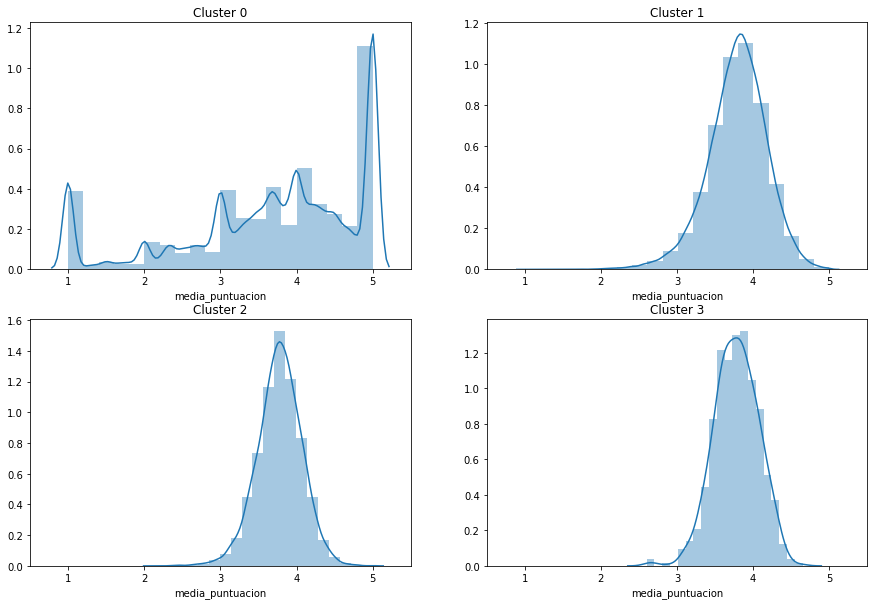

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 0]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])

plt.title("Cluster 0")

ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 1]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 1")

ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 2]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 2")

ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 3]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 3")

Rápidamente, nos podemos dar cuenta de que estos usuarios son bastante optimistas con las puntuaciones. La distribución de los valores de media de puntuación en el caso del cluster 0 difiere considerablemente con respecto al resto de clusters. Incluso llegando al punto de no formar una normal. Algo que llama bastante la atención son los distintos picos que aparecen en la distribución del cluster 0:

- La barra que sale en la **puntuación media próxima al cinco**. Como se puede observar, es realmente alta. Esto se puede deber a que los usuarios de este cluster son realmente extremistas; si les gusta algo, le dan un 5 directamente.


- La barra contraria a la mencionada anteriormente es la que está próxima a 1. Siguiendo el mismo razonamiento de antes, estos usuarios son muy extremos y cuando algo no les gusta le dan una puntuación mínima muy frecuentemente. Sin embargo, la cantidad de gente que da 1 no es tan grande como la cantidad de gente que da 5.


- Por último, cabe destacar que en la media 2 y 4 también hay una pequeña barra que sobre sale con respecto al resto. Parece ser que hay gente no tan extremista pero que también dan valores bastante altos.

Podemos observar que en el resto de clusters, la media de la puntuación es muy parecida entre sí. En general, podemos decir que los usuarios de los cluster 1, 2 y 3 son más críticos puesto que poca gente da notas altas como un 5 y la gran mayoría se centra en valores medios próximos al 4 y 3.5. Además, prácticamente nadie da puntuaciones muy bajas en estos cluster.

<a id="id3.1"></a>
## 3.1. Análisis de outliers

Una vez hemos separado en clusters el dataset, vamos a comenzar a analizar cada uno de ellos por separado. Para comenzar, vamos a hacer boxplot de los seguidores, para poder identificar qué usuarios son más "famosos" y seguramente tengan las opiniones más visualizadas.

<Figure size 1080x720 with 0 Axes>

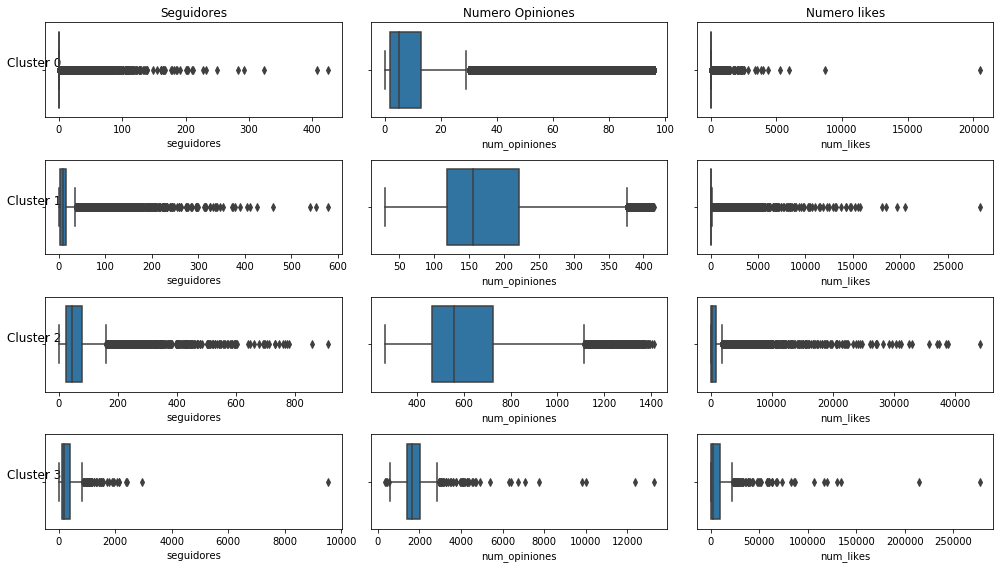

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))


rows = ['Cluster {}'.format(row) for row in range(0, 4)]
cols = ['{}'.format(col) for col in ['Seguidores', 'Numero Opiniones', 'Numero likes']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 8))

# Cluster 0
ax = axes[0][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["seguidores"], ax = ax)

ax = axes[0][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["num_opiniones"], ax = ax)

ax = axes[0][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["num_likes"], ax = ax)

# Cluster 1
ax = axes[1][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["seguidores"], ax = ax)

ax = axes[1][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["num_opiniones"], ax = ax)

ax = axes[1][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["num_likes"], ax = ax)

# Cluster 2
ax = axes[2][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["seguidores"], ax = ax)

ax = axes[2][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["num_opiniones"], ax = ax)

ax = axes[2][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["num_likes"], ax = ax)

# Cluster 3
ax = axes[3][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["seguidores"], ax = ax)

ax = axes[3][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["num_opiniones"], ax = ax)

ax = axes[3][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["num_likes"], ax = ax)

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

fig.tight_layout()

A simple vista, parece que los clusters no han tenido demasiado efecto. Sin embargo, aunque parezca que no, el número de instancias que tenemos que manejar al mismo tiempo se ha reducido significativamente. Además, hemos conseguido separar el dataset en niveles que era nuestro objetivo primordial. Se pueden hacer algunas observaciones interesantes sobre los boxplot:

- En todas las gráficas de seguidores se puede observar como **hay una gran cantidad de overliers**. Esto podría llegar a significar que los clusters no se han hecho correctamente: los overliers del cluster 0 deberían estar en el cluster 1, los del cluster 1 en el cluster 2, etc... Aunque esto puede ser cierto, la cuestión es que **no solo debemos tener en cuenta la variable seguidores**. Como hemos utilizado las tres variables para hacer clustering, puede ser que las personas con muchos seguidores en el cluster 0, no tengan apenas likes o seguidores.


- En el caso de los seguidores, podemos comprobar como la caja y los bigotes del cluster 0 se encuentran mucho menos distribuidos que en el resto. Esto se debe a que en el cluster 0, la mayoría de las personas tienen un **número de seguidores próximo a 0**.


- El caso del cluster 3 es bastante especial ya que **parece** que no sigue la tendencia de los anteriores. Sin embargo, **esto no es así**. Realmente, lo que ocurre es que sus **overliers están tan dispersos** y tienen un rango tan elevado que el boxplot se ve deformado. Un ejemplo muy claro es el gran overlier que se puede ver en los seguidores del cluster 3. Estos overliers podrían llegar  ser eliminados, sin embargo preferimos analizarlos aparte ya que aportan información.


- En el boxplot del número de opiniones del cluster 3 se pueden observar overliers por abajo. Esto solo se puede ver en ese boxplot.


- Gracias a los boxplot podemos confirmar de nuevo cuál es la distribución de los datos en el número de opiniones (**una normal**)


- Por último, debemos mencionar que el número de likes del cluster 3 tiene los overliers más extremos de todos. Llegando incluso a 40.000 likes.

Para que el número de seguidores del cluster 3 se pueda ver mejor, vamos a eliminar la instancia que tiene más de 8000 seguidores. Esta instancia no nos da demasiada información y solo dificulta el análisis del resto de los usuarios.

In [34]:
# Obtenemos la persona cuyos seguidores es más de 8.000
df_users_limpio[df_users_limpio['seguidores'] > 8000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
822302,37cpUoM8hlkSQfReIEBd-Q,Mike,1634,19715,10085,13227,"2012,2013,2014,2015,2016,2017,2018",7,"C8vMgFk7K1luWh3tUY_g7A, i1KRBtPqEPqelfP5NaiRmw...",5591,9538,4.3,359,101,51,115,27,401,640,934,934,472,1493,5527,2009,9,4,25,14,3


In [35]:
# Eliminamos a Mike porque es un overlier
df_users_limpio = df_users_limpio.drop(822302, axis=0)

Una vez hemos eliminado a Mike, podemos plotear de nuevo el boxplot para comprobar que ahora se ve mucho mejor.

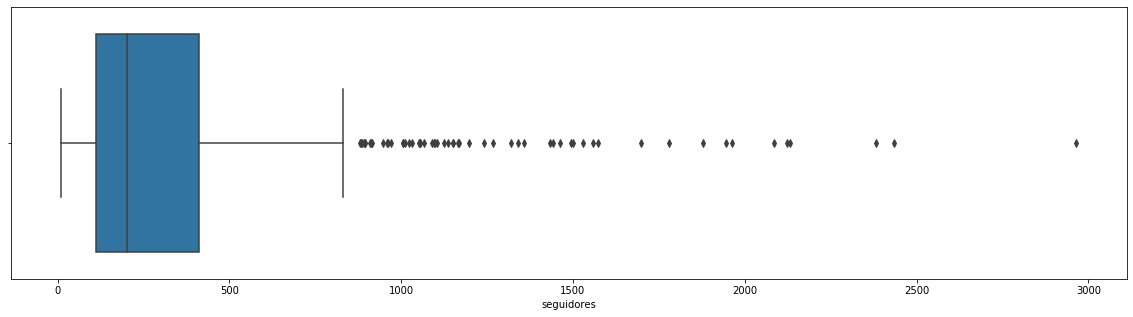

In [36]:
plt.figure(figsize=(20, 5))

sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["seguidores"])

Obtenemos los influencers potenciales quedándonos solo con aquellos usuarios del cluster 3 que tienen una cantidad de seguidores mayor de 850. Esta medida está hecha a ojo, no hemos cuadrado exactamente el valor del whisker. Puede parecer que estamos cometiendo un error al diferenciar a los influencers solo teniendo en cuenta los seguidores después de haber hecho el clustering mediantes 3 variables. Sin embargo, esta es la **variable que consideramos que tiene más importancia.**

<a id="id3.2"></a>
## 3.2. Usuarios poco conocidos

Nos interesamos en buscar este tipo de usuarios debido a la siguiente gráfica.

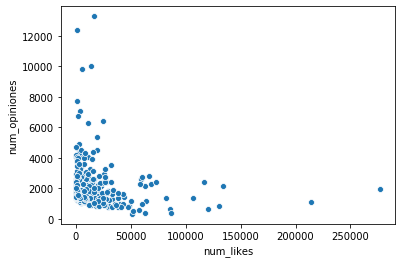

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(x = "num_likes", y = "num_opiniones", data = df_users_limpio[df_users_limpio['categoria'] == 3])

Este plot tiene unas características muy particulares.

- La mayoría de los usuarios no tienen ni muchos likes ni muchas opiniones. Esto dentro de lo que cabe es **normal**; la mayoría de la gente no escribe opiniones por lo que tampoco pueden recibir demasiados likes por lógica.


- A simple vista se puede observar que **obtener más likes no es directamente proporcional al número de opiniones**. Si nuestro objetivo es tener likes en la aplicación, lo que deberíamos hacer, siguiendo la gráfica, sería tener menos de 3000 likes aproximadamente. Esto es **anti-intuitivo** ya que lo normal sería pensar que cuantas más opiniones, más likes. Desconocemos el motivo de esto hasta ahora, así que vamos a intentar ver qué tipo de opiniones exponen estas personas. Sobre todo las más extremas.


- En el caso de los likes, podemos observar como la persona que más tiene solo ha escrito 2000 opiniones aproximadamente. Esto sigue potenciando lo anteriormente dicho.

Como ya hemos mencionado, para revisar estas anomalías, vamos a obtener los datos de las opiniones y vamos a intentar ver qué tipo de opiniones hacen estos usuarios.

In [38]:
ID = df_users_limpio[df_users_limpio['categoria'] == 3][df_users_limpio['num_opiniones'] > 5300]
ID.sort_values('num_opiniones')

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
8187,HFECrzYDpgbS5EmTBtj2zQ,Eric,5398,36902,20862,29941,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",11,"X4yDntO5EhsRVYZraEvc-g, jAYP7ALlgpYfJCjGqvMPMQ...",3105,410,3.93,2110,185,246,113,233,1030,6679,3642,3642,1177,340,19397,2007,11,3,28,19,3
2202,CxDOIDnH8gp9KXzpBHJYXw,Jennifer,6314,20336,8823,12995,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",10,"mrru6hbeQLvagU4vkfuqmw, wt0lL3xJIGeJ1r0qO-vkrg...",562,715,3.32,704,188,37,67,92,1321,3629,1606,1606,446,1414,11110,2009,9,11,9,20,3
7023,Hi10sGSZNxQH3NLyWSZ1oA,Fox,6407,89418,86122,82128,"2014,2015,2016,2017,2018",5,"2vFUeQGnG8zdLSQkwfChog, 6YDC4RNaAUdTSkhJ1WUC9w...",4542,1574,3.83,3032,361,337,111,40,1861,4379,5429,5429,1371,2276,24626,2009,9,5,26,11,3
5178,Xwnf20FKuikiHcSpcEbpKQ,Kenneth,6738,7937,3447,4848,Ninguno,0,"GIXfNlfssbAzcB1vXUHjuA, Mln71x70ZKNA7EDxtK9EpQ...",2557,265,3.32,93,39,13,2,1,212,505,299,299,79,95,1637,2011,7,6,10,3,3
2534,nmdkHL2JKFx55T3nq5VziA,Nijole,7089,45394,23305,35978,"2012,2013,2014,2015,2016,2017,2018",7,"tipQmXdg181T4NvxrXPjFg, HIzR-HJTESQc35nrVORjsQ...",3832,750,3.70,277,66,20,18,6,314,706,663,663,456,515,3704,2011,7,11,29,15,3
6876,8RcEwGrFIgkt9WQ35E6SnQ,George,7750,7973,3822,3143,"2010,2011",2,"o_8sVoYIFnoVun5YY_lAEg, Nrk_KRh141kU_Z-4a31E3A...",968,282,3.49,36,23,7,4,14,137,220,98,98,68,78,783,2009,9,11,6,22,3
982453,P5bUL3Engv-2z6kKohB6qQ,Kim,9821,25980,9827,20004,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...",13,"gD4815cefTvYc7O6VRWP4g, 3MJI1RDk8aH3ANr7I1AVgA...",3521,746,3.80,828,125,104,47,34,490,1052,1154,1154,466,186,5640,2006,12,5,31,21,3
585,hWDybu_KvYLSdEFzGrniTw,Bruce,10022,74829,49785,61383,"2010,2011,2012,2013,2014,2015,2016,2017,2018",9,"QZ3grLRAy7do7inT4OcltQ, 6pbATMd0sGeOJvAEt6znqw...",1833,528,3.61,1907,436,337,21,66,924,2749,2502,2502,1456,1052,13952,2009,9,3,8,21,3
2810,RtGqdDBvvBCjcu5dUqwfzA,Shila,12390,9403,3405,2887,"2012,2013,2014,2015,2016,2017,2018",7,"uBDAAXcL3Fmo0YQrwpE9ew, LUHwtIgfclx_9PKfJJQ1YA...",279,256,3.85,94,19,3,7,7,129,167,157,157,96,9,845,2010,8,10,17,6,3
818915,8k3aO-mPeyhbR5HUucA5aA,Victor,13278,79512,50899,59766,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",11,"-xt4IBJ-BXo-9Yg9qI0ZLA, augJQotyLB503iq1gVJ_tg...",5158,1125,3.28,2045,222,208,54,84,1888,3432,3091,3091,2570,59,16744,2007,11,12,8,14,3


ID contiene la lista de los usuarios con más opiniones que hemos podido ver en la grafica

In [39]:
ID['usuario_id'].tolist()

['hWDybu_KvYLSdEFzGrniTw',
 'CxDOIDnH8gp9KXzpBHJYXw',
 'nmdkHL2JKFx55T3nq5VziA',
 'RtGqdDBvvBCjcu5dUqwfzA',
 'Xwnf20FKuikiHcSpcEbpKQ',
 '8RcEwGrFIgkt9WQ35E6SnQ',
 'Hi10sGSZNxQH3NLyWSZ1oA',
 'HFECrzYDpgbS5EmTBtj2zQ',
 '8k3aO-mPeyhbR5HUucA5aA',
 'P5bUL3Engv-2z6kKohB6qQ']

Obtenemos los textos de los usuarios que hemos obtenido en la gráfica mediante la separación en chunks del archivo de opiniones.

In [40]:
opinionesChunk = pd.read_csv("../Dataset/datos_opiniones_limpio.csv", chunksize= 100000)
usuariosMuchasOpiniones = ID['usuario_id'].tolist()
chunk_list = []

def preprocesarChunk(chunk):
    # Aquí deberiamos coger el id del usuario y el texto de su review
    chunk = chunk[['usuario_id', 'texto']]
    chunk = chunk[chunk['usuario_id'].isin(usuariosMuchasOpiniones)]
    
    return chunk
    
for chunk in opinionesChunk:
    chunk_filter = preprocesarChunk(chunk)
    
    chunk_list.append(chunk_filter)
    
opiniones = pd.concat(chunk_list, ignore_index=True).reset_index()

In [41]:
opiniones

,index,usuario_id,texto
0,0,hWDybu_KvYLSdEFzGrniTw,I've shopped at a half-dozen or so Neighborhoo...
1,1,hWDybu_KvYLSdEFzGrniTw,I love Owen's bagels. Interesting and creative...
2,2,CxDOIDnH8gp9KXzpBHJYXw,Huge Buns! Good Quality!\n\nBrothers Bakery ha...
3,3,CxDOIDnH8gp9KXzpBHJYXw,This review updated is based on dim sum experi...
4,4,hWDybu_KvYLSdEFzGrniTw,"Located halfway down the B concourse at CLT, A..."
...,...,...,...
6728,6728,nmdkHL2JKFx55T3nq5VziA,This is a great location right on the strip an...
6729,6729,CxDOIDnH8gp9KXzpBHJYXw,Memphis BBQ is a perfect spot for a down to ea...
6730,6730,CxDOIDnH8gp9KXzpBHJYXw,Another new Asian restaurant opened at this lo...
6731,6731,hWDybu_KvYLSdEFzGrniTw,Bring a quarter so that you can get a shopping...


La verdad es que no hemos llegado a ninguna conclusión después de ver el tipo de opiniones que hace la gente con más opiniones; podría hacerse pasar por la de cualquier otro. Lo único que nos ha llamado la atención es que no aparecen todas las opiniones, solo aparece un subconjunto. Esto se debe a que no tenemos toda la base de datos.

<a id="id3.3"></a>
### 3.3. Tipos de opiniones de los outliers

Algo que también nos llamó la atención es la aparición de usuarios con una cantidad de seguidores y de likes realmente elevada. En la siguiente gráfica se puede ver de lo que estamos hablando.

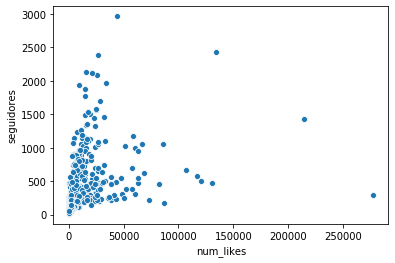

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(x = "num_likes", y = "seguidores", data = df_users_limpio[df_users_limpio['categoria'] == 3])

Ya habíamos visto con anterioridad que hay cuatro puntos en esta gráfica que sobresalen con respecto al resto. Ahora vamos a aislarlos y a observar que características tienen que los diferencia. También observaremos sus opiniones para ver si tienen algo de especial.

In [43]:
overliers = df_users_limpio[df_users_limpio['categoria'] == 3][(df_users_limpio['num_likes'] > 150000) | \
                                                   (df_users_limpio['seguidores'] > 2500) | \
                                                   ((df_users_limpio['seguidores'] > 2000) & (df_users_limpio['num_likes'] > 100000))]
overliers

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
1271,eKUGKQRE-Ywi5dY55_zChg,Cherylynn,2190,78888,64172,65573,"2010,2011,2012,2013,2014,2015,2016,2017,2018",9,"9meGsHGlIwf-W8VIh7-DVA, DHs8No90RxNP6EQHHNEZvg...",5637,2434,3.67,21956,1981,2510,1195,397,7579,12650,19348,19348,8341,39055,134360,2008,10,1,20,6,3
1301,hizGc5W1tBHPghM5YKCAtg,Katie,1448,37796,26881,31252,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",10,"BsPTBl0_5rZXrfVP4HffqQ, _NNnlcRTDIYqejVEAZ5Fmw...",6852,2964,4.19,6313,408,401,366,252,2881,14888,7268,7268,2446,1447,43938,2009,9,5,22,20,3
179457,JjXuiru1_ONzDkYVrHN0aw,Richard,1086,99162,77758,93938,"2011,2012,2013,2014,2015,2016,2017,2018",8,"MFI4twbiz8UJxU-XHSlH-g, Rjb-gVuAeS9h75Svz0aYsg...",4716,1434,4.12,16245,3637,5990,2829,2332,10139,52103,32266,32266,12128,44390,214325,2009,9,8,23,13,3
1146706,Tqm7Wu7IBJ1td3Ab5ZpUhw,Brian,1998,45970,35437,44267,Ninguno,0,"4P8EDoVkcSLJs2XP5DJIPg, N6tzBF-6Lx3Mip-w_C0E9g...",917,297,4.27,24328,13500,14173,13654,12669,15907,24928,29937,29937,15442,82602,277077,2009,9,1,1,2,3


En el dataframe de justo arriba podemos ver cuáles son las ID de los usuarios más conocidos. Ahora lo que vamos a hacer es utilizar la misma técnica del apartado anterior (separación en chunks) para obtener las opiniones de este tipo de usuarios. Cabe destacar que el overlier que quitamos anteriormente (Mike) también debería estar dentro de estos usuarios, pero decidimos eliminarlo debido a que se salía demasiado de la media en estos aspectos.

In [44]:
import pandas as pd

opinionesChunk = pd.read_csv("../Dataset/datos_opiniones_limpio.csv", chunksize= 100000)
usuariosOverliers = overliers['usuario_id'].tolist()
chunk_list = []

def preprocesarChunk(chunk):
    # Aquí deberiamos coger el id del usuario y el texto de su review
    chunk = chunk[['usuario_id', 'texto']]
    chunk = chunk[chunk['usuario_id'].isin(usuariosOverliers)]
    
    return chunk
    
for chunk in opinionesChunk:
    chunk_filter = preprocesarChunk(chunk)
    
    chunk_list.append(chunk_filter)
    
opiniones = pd.concat(chunk_list, ignore_index=True).reset_index()

In [45]:
opiniones

,index,usuario_id,texto
0,0,eKUGKQRE-Ywi5dY55_zChg,2.5 STARS...\n\nLiving in SF all my life and b...
1,1,eKUGKQRE-Ywi5dY55_zChg,4 STARS (rounded down from 4.49 stars)! If it ...
2,2,hizGc5W1tBHPghM5YKCAtg,"For a group of 20ish people, we had a $40/per ..."
3,3,JjXuiru1_ONzDkYVrHN0aw,There are historic places because of how old t...
4,4,eKUGKQRE-Ywi5dY55_zChg,* * * * * * A L M O N D C O O K I E S * * * ...
...,...,...,...
67,67,eKUGKQRE-Ywi5dY55_zChg,Friendly Taxi Cab Drivers? SAY WHAAAAAAT?!?!?\...
68,68,hizGc5W1tBHPghM5YKCAtg,"I'm in Scottsdale, bitch! While it's not a cit..."
69,69,Tqm7Wu7IBJ1td3Ab5ZpUhw,A\nlove\ntrain\n\nURRKN stands for Underground...
70,70,hizGc5W1tBHPghM5YKCAtg,My new favorite bar in Vegas. When you don't w...


In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(opiniones['texto'])

0     2.5 STARS...\n\nLiving in SF all my life and b...
1     4 STARS (rounded down from 4.49 stars)! If it ...
2     For a group of 20ish people, we had a $40/per ...
3     There are historic places because of how old t...
4     * * * * * * A L M O N D   C O O K I E S * * * ...
5     Surrender is like the envious little sister of...
6     3.5 STARS\n\nYay! It's hella Chinesey up in he...
7     And, my 100th YELP Review goes to....Drum Roll...
8     Every time I visit AZ, I find myself at The Vi...
9     Yeah, I know what you're thinking! 3 stars for...
10    Making a grand entrance is overrated...it's AL...
11    Ladiessssssss....hold tight to those purses!\n...
12    Secret pizza is the shit. Sober or drunk, it's...
13    My last meal in Montreal did not rhyme with wo...
14           Crowded, funsies and good music! Me likey!
15    THE HOTTEST NEW CLUB IN VEGAS?!?!?\n\nXS is ST...
16    THE MOST PICTUREQUE PLACE FOR BRUNCH ON THE VE...
17    After our dinner at Lavo, I had to "Lavo" 

Después de mirar en general los textos que hacen estas personas con un número de likes y de seguidores más elevado, no podemos llegar a ninguna conclusión clara. Como mucho, podemos decir que estas opiniones suelen ser más **llamativas** debido al uso de mayúsculas, expresiones graciosas, uso de caracteres especiales como asteriscos e incluso insultos. 